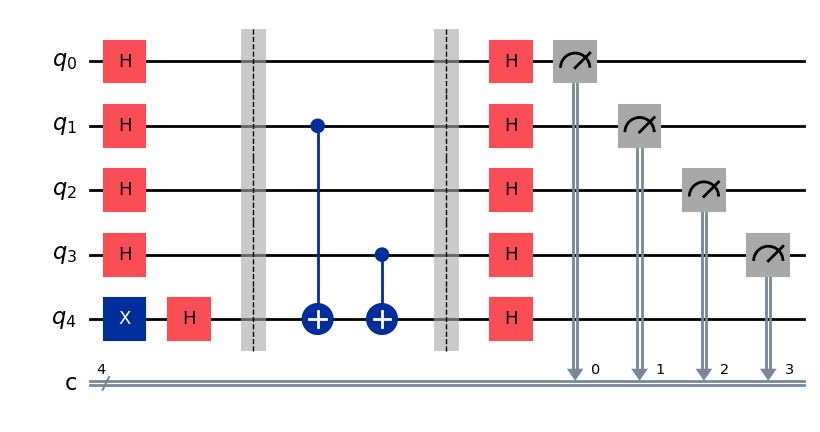

In [34]:
from qiskit import *
%matplotlib inline

# Create Bernstain-Vazirani circuit for n bit string
# - Changing the bit string will change the circuit
mypassword = '1010'

circuit = QuantumCircuit(len(mypassword)+1, len(mypassword))

# Apply Hadamard gates before querying the oracle
circuit.h(range(len(mypassword)))

circuit.x(len(mypassword))
circuit.h(len(mypassword))
# Apply barrier for visual separation
circuit.barrier()

# Apply the inner-product oracle
for ii, oneorzero in enumerate(reversed(mypassword)):
    if oneorzero == '1':
        circuit.cx(ii, len(mypassword))

# Apply barrier for visual separation
circuit.barrier()

# Apply Hadamard gates after querying the oracle
circuit.h(range(len(mypassword)+1))

# Measure the input register
circuit.measure(range(len(mypassword)), range(len(mypassword)))

circuit.draw(style='iqp', output='mpl')


- Is no necesary use the last Hadamard gate in the las qubit, because the oracle is the same.

In [16]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1).result()
counts = result.get_counts()
print(counts)

{'1010': 1}


## In this case, I'm going to replace gates and simplify the circuit

#### In the first qubit, the initial state is 0, so, I can cancel both Hadamard gates in that qubit. And nothing will change. The same thing in the 3rd.

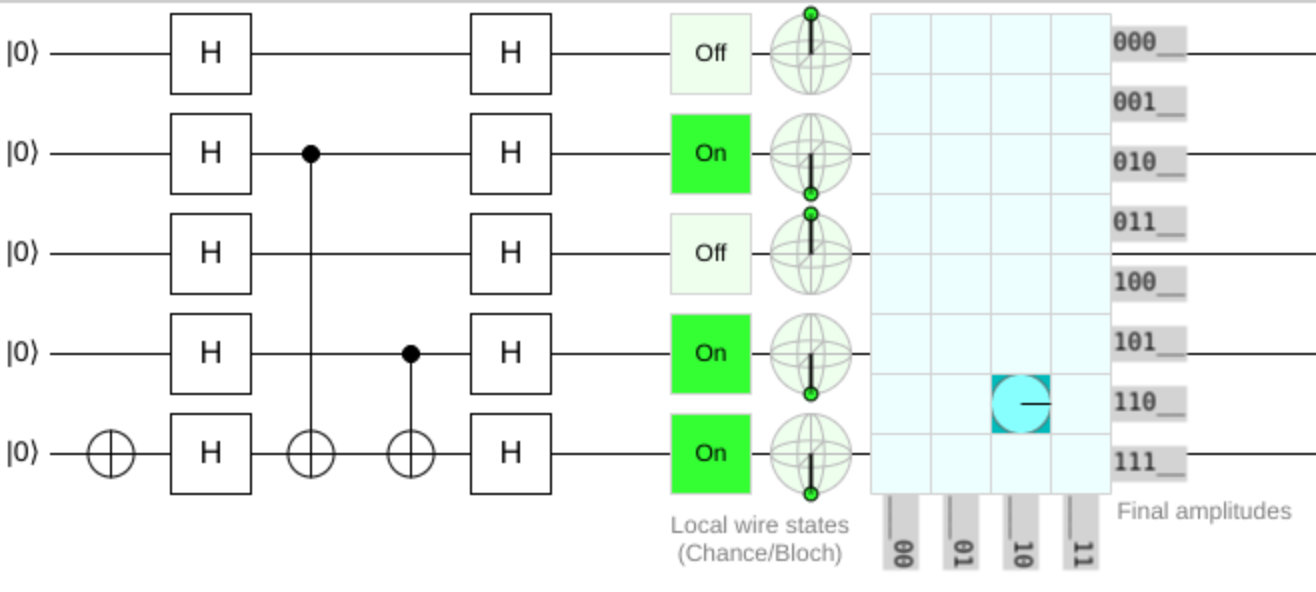

#### The circuit changes, but the result is always the same

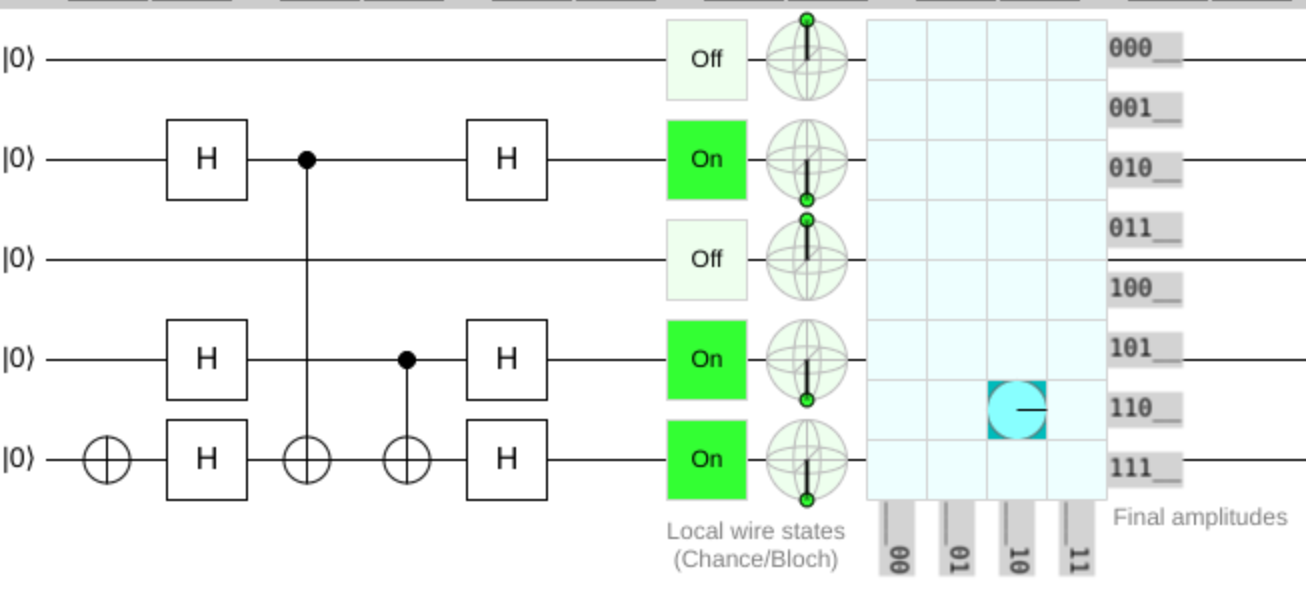

#### from now, i can rearange the Hadamards like this.

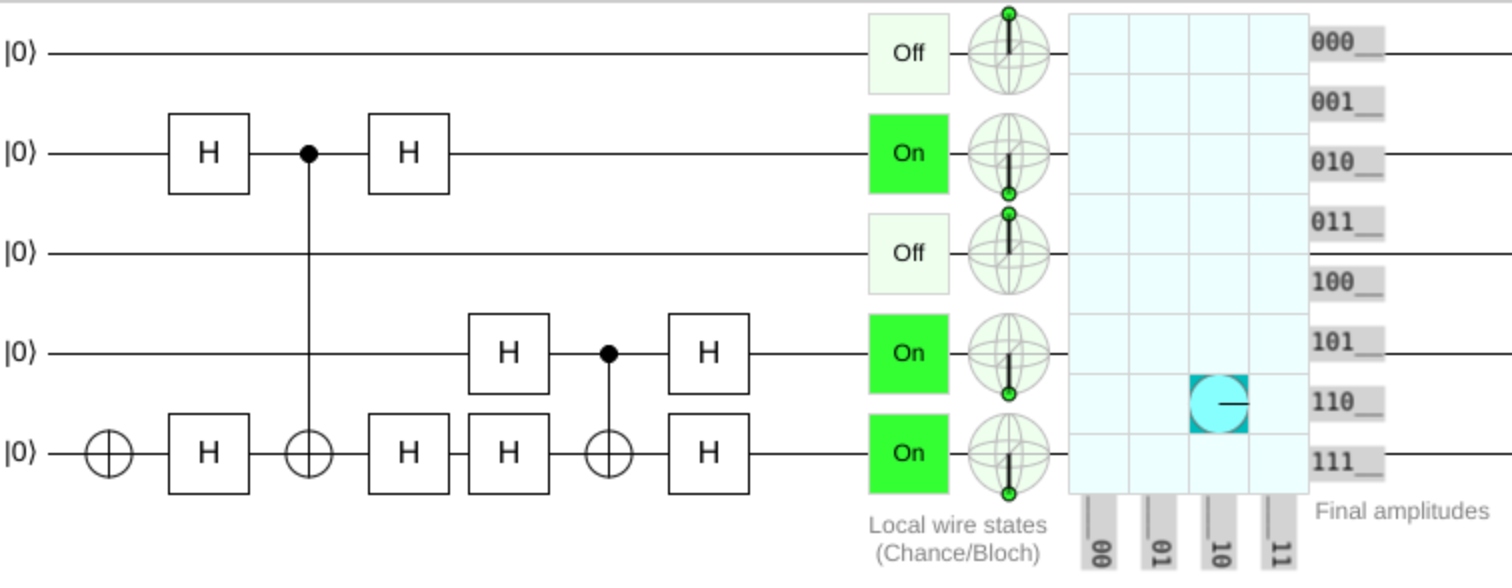

#### Four Hadamards and one CX, is equal to a reverse CX. And steal having the same result.

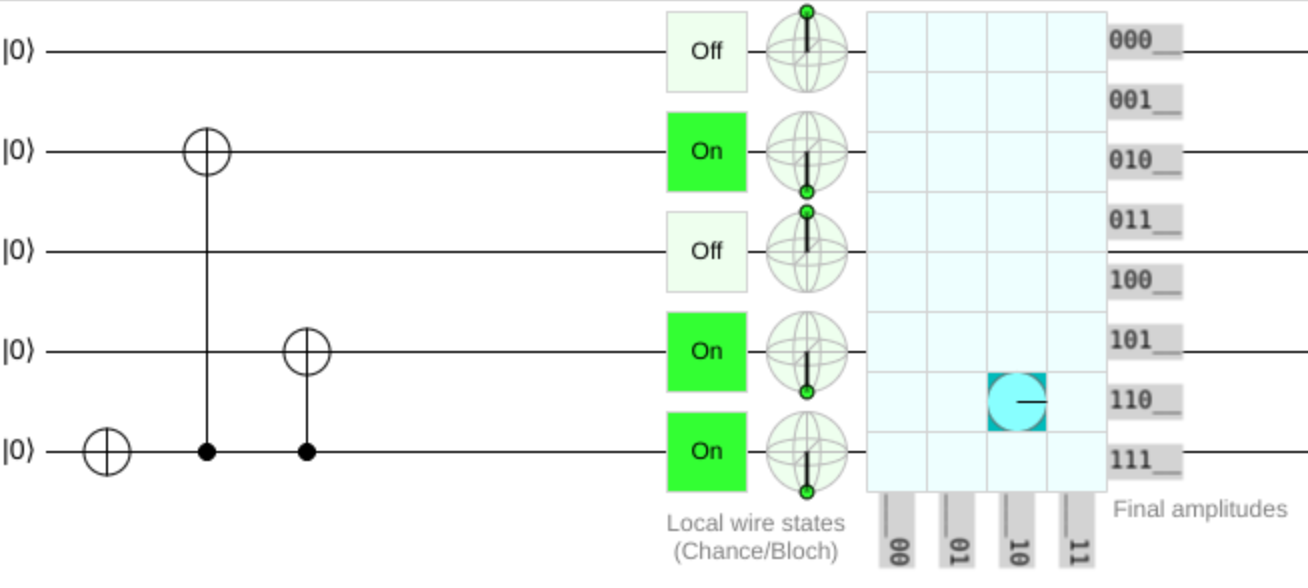




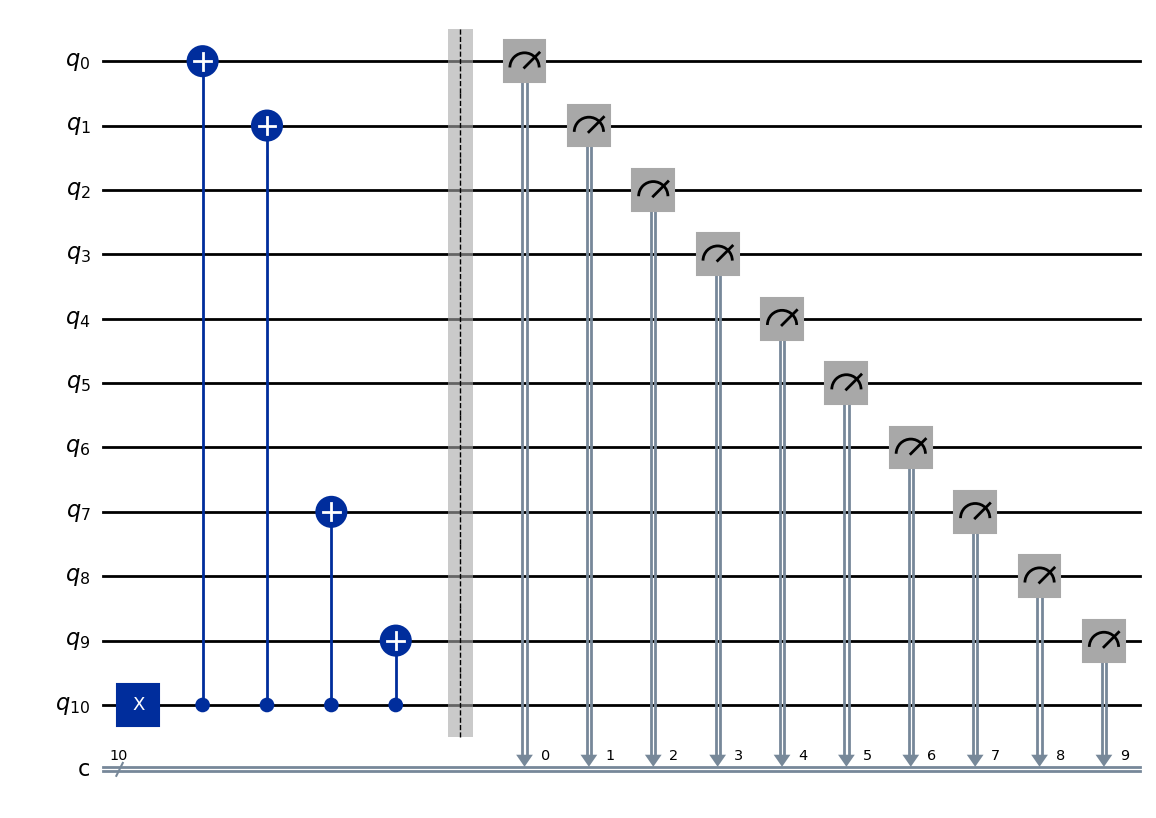

In [36]:
# In this algorithm, the output is the secret bit string, 
# like before, but we only use inverse cx gates to get the secret bit string

password = '1010000011'

simplecircuit = QuantumCircuit(len(password)+1, len(password))

simplecircuit.x(len(password))

for i, zeroorone in enumerate(reversed(password)):
  if zeroorone == '1':
    simplecircuit.cx(len(password), i)

# Aplly barrier for visual separation
simplecircuit.barrier()

# Measure the input register
simplecircuit.measure(range(len(password)), range(len(password)))

simplecircuit.draw(style='iqp', output='mpl')

In [37]:
simulation2 = Aer.get_backend('qasm_simulator')
result2 = execute(simplecircuit, backend=simulation2, shots=1).result()
counts2 = result2.get_counts()
print(counts2)

{'1010000011': 1}


In [44]:
# to see the qiskit version
import qiskit.tools.jupyter
%qiskit_version_table
qiskit.__qiskit_version__

{'qiskit': '0.45.0', 'qiskit-aer': '0.13.0', 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.20.2', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}